
Nessa etapa do projeto, decidimos continuar nossos estudos do SR2 tentando predizer qual seria as notas que os jogadores de boardgames iriam dar aos jogos da plataforma para que dessa forma conseguissemos influenciar nossos ADs dentro da plataforma e monetizar em cima do fluxo de usuarios dentro da plataforma.

O Rating do board-game será calculado através da base historica de boardgames. 

Os métodos utilizados nesse estudo foram: 
- Regressão de modelos Linear
- Random Forest (evoluíndo o modelo que tinhamos no segundo status)
- KNN

Todas as performances dos modelos foram evoluídas usando o MSE e o MAE

Uma EDA também foi conduzida nesse Notebook, baseada na modificação dos datasets para diminuir o noise.

In [2]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/Project 6_SR1.ipynb
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/database.sqlite
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/.DS_Store
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/README.md
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/SR2.ipynb
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/games.csv
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/SR3.ipynb
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/archive.zip
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/games.csv.zip
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/.ipynb_checkpoints/SR2-checkpoint.ipynb
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/.ipynb_checkpoints/SR3-checkpoint.ipynb
/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/.git/config
/Users/victoralmeida/Documents/faculdade/6th/projeto

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/victoralmeida/Documents/faculdade/6th/projeto/Project6/games.csv")
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

O dataset tem pelo menos 20 features e 81.312 linhas. Notamos a partir dos resultados do df.info() que algumas linhas não tinham dados. Por exemplo, 'minplaytime' tem 81309 valores nulos. Decidimos então que todas as features que tinham valores nulos deveriam ser dropados.

A variável dependente do estudo aqui é avarage_rating. O dataset vai ser splitado em duas partes, uma parte será usada para o treinamento dos modelos enquanto a outra parte vai ser usada para testar e validar os modelos. A performance do modelo vai ser evoluindo essa parte de teste. 


In [6]:
df = df.drop(columns=["id", "bayes_average_rating", "type", "name"])
df.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


In [7]:
print(df.shape)

(81312, 16)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

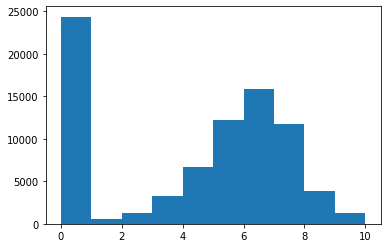

In [8]:
plt.hist(df["average_rating"])

Na curva de distribuição acima, pode ser observado que muitas linhas tem um rating de zero (O que não é possível, já que o menor valor permitido é 1); essas linhas serão dropadas da analise, como as linhas são resultado de variaveis dependentes tendo valores irracionais, ou em muitos casos valores nulos. Como pode ser visto abaixo 24,380 linhas tem o rating de zero.

In [9]:
df1 = df[df["average_rating"]==0]
df1.shape

(24380, 16)

In [10]:
# Eliminando todas as linhas que tem rating = 0 ou menor 
df = df[df["average_rating"]>0]
df.shape

(56932, 16)

In [11]:
# Selecionando os jogos em que o numero de usuarios que o avaliaram
# era maior que zero
df = df[df["users_rated"] > 0]
df = df.dropna(axis=0)
df.shape

(56930, 16)

A partir daqui eu plotei vários gráficos para visualizar como o rating estaria variando com os outros parametros independentes. Isso foi feito para desenvolver a intuição sobre o tipo de Algoritmo que deveriamos usar. E também me deu algumas ideias sobre como os dados poderiam ser modificados para obter melhores resultados.

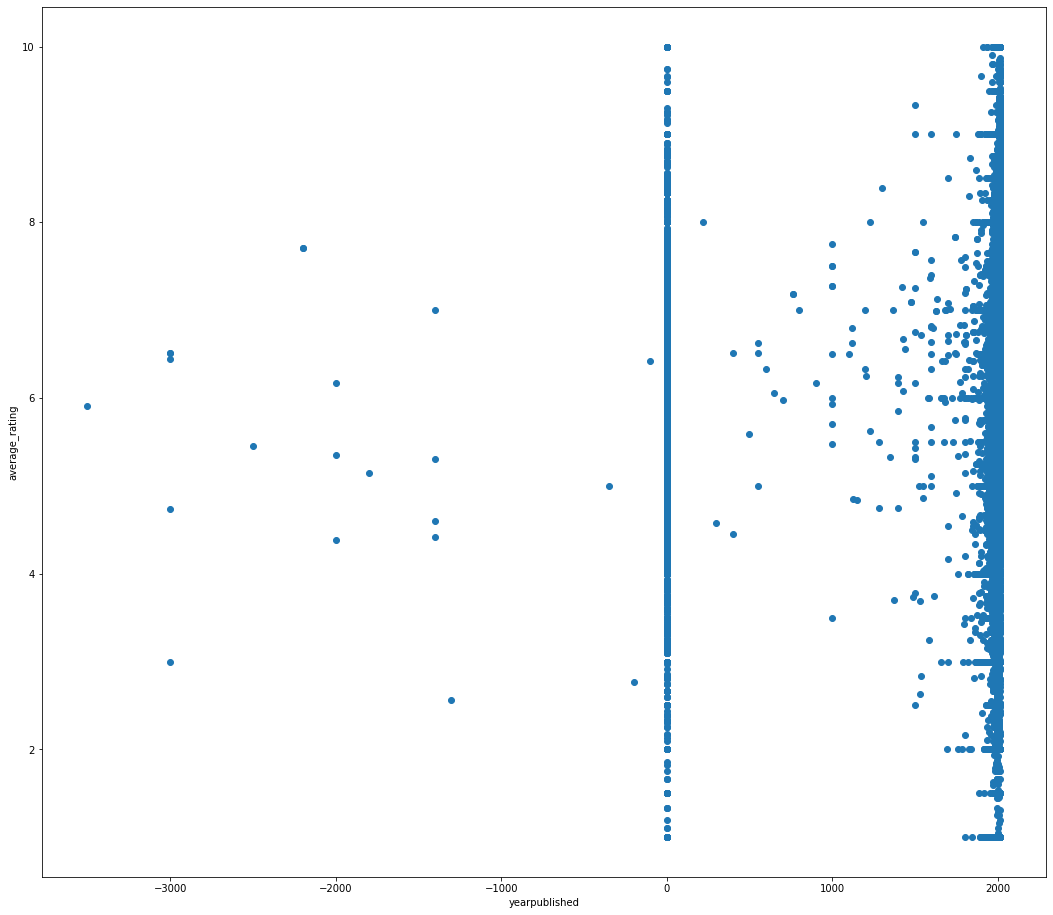

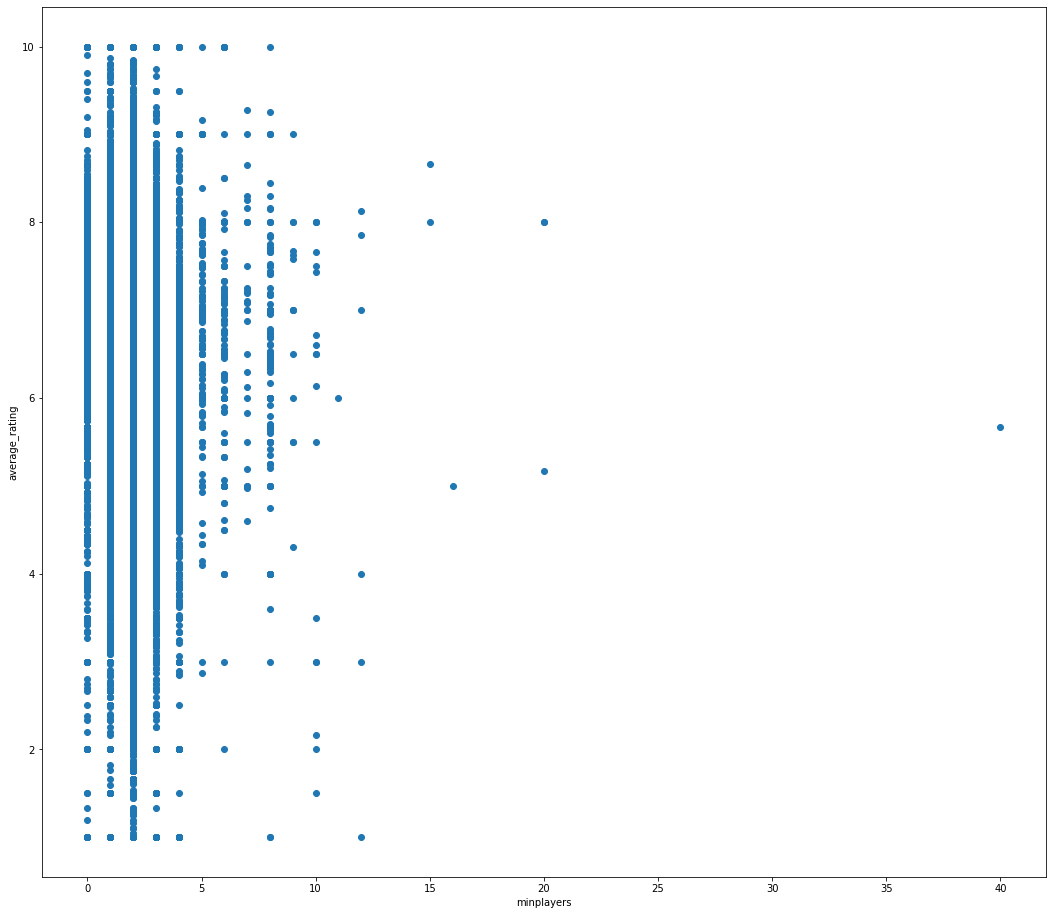

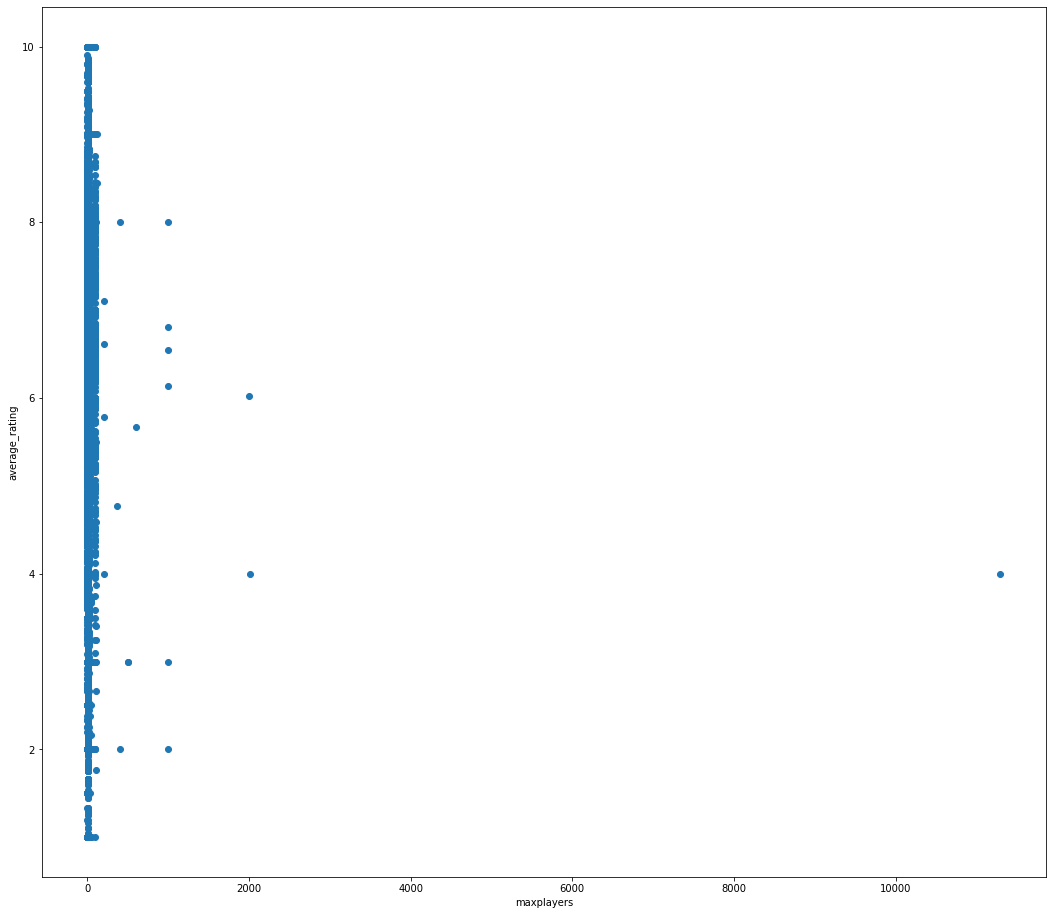

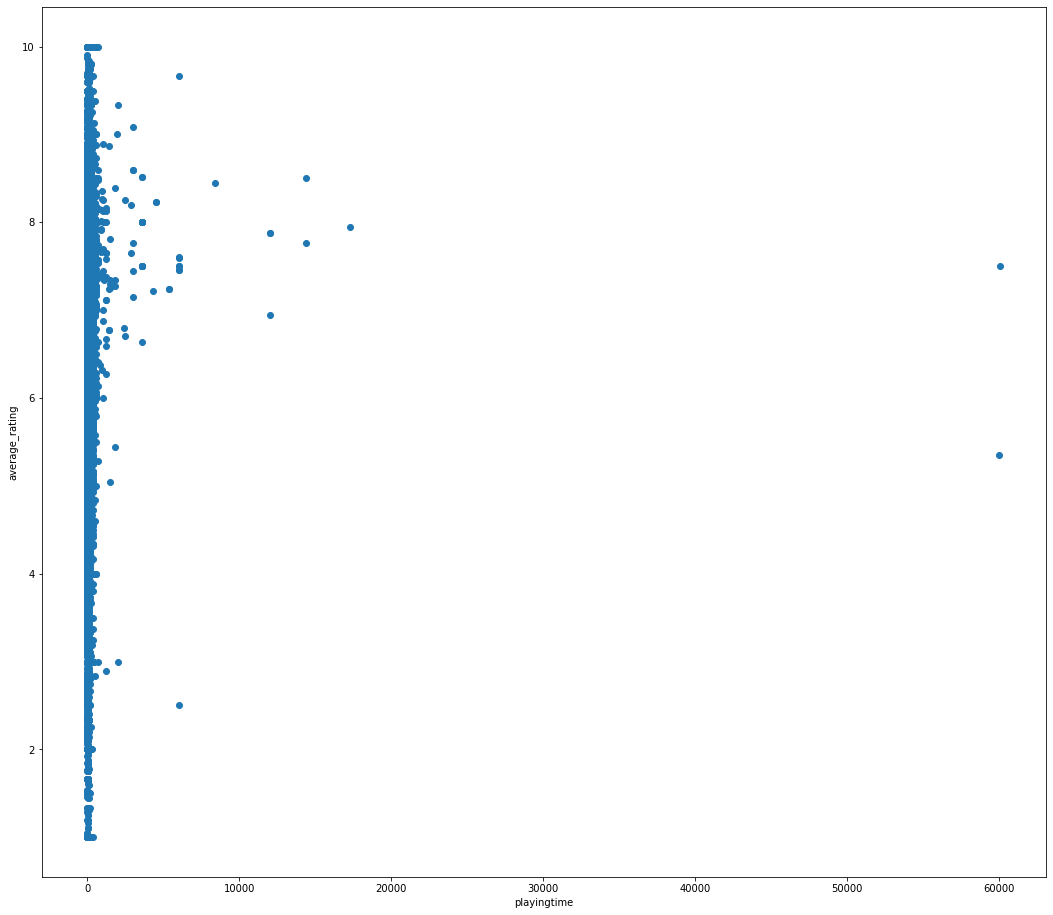

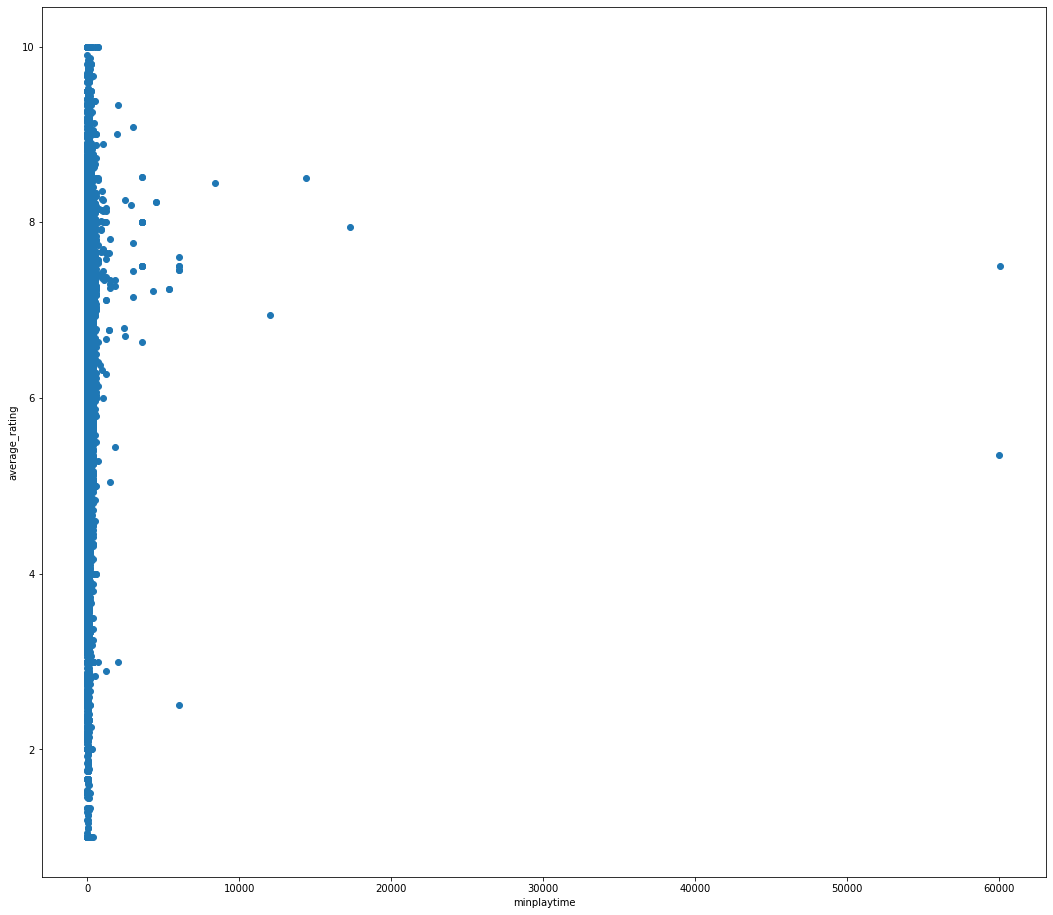

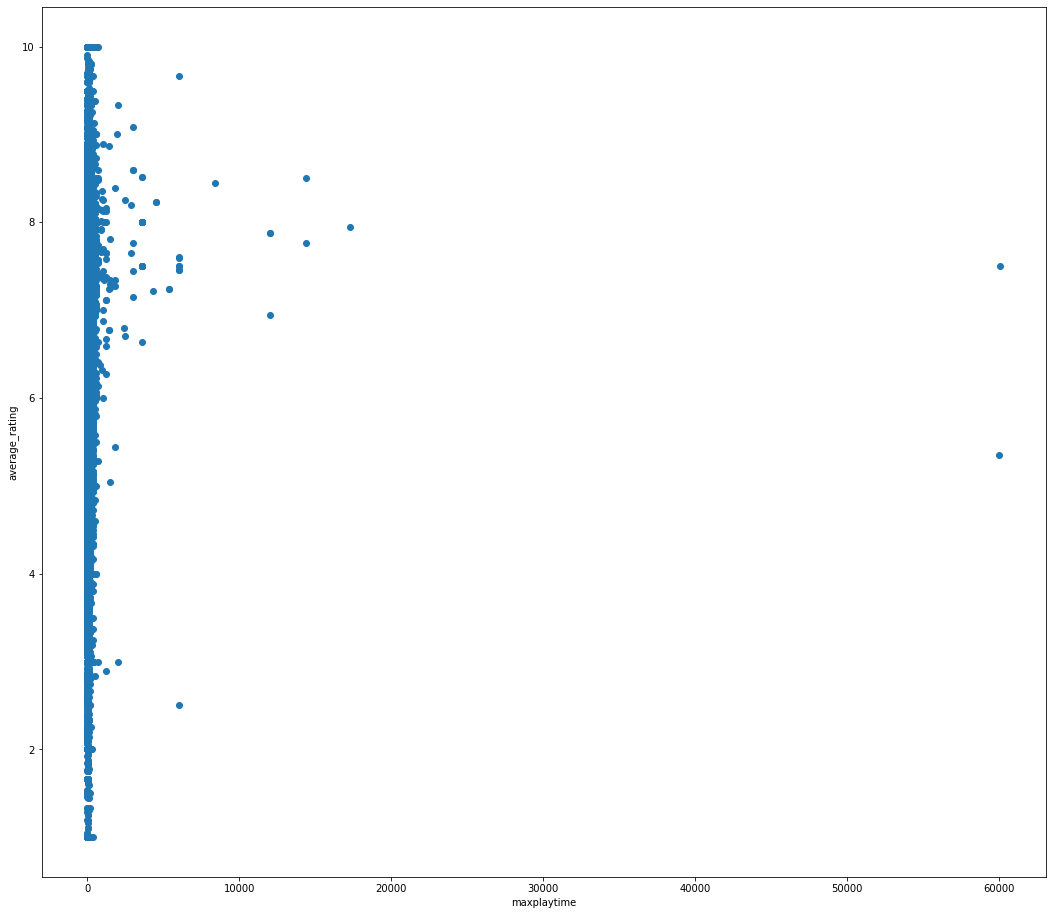

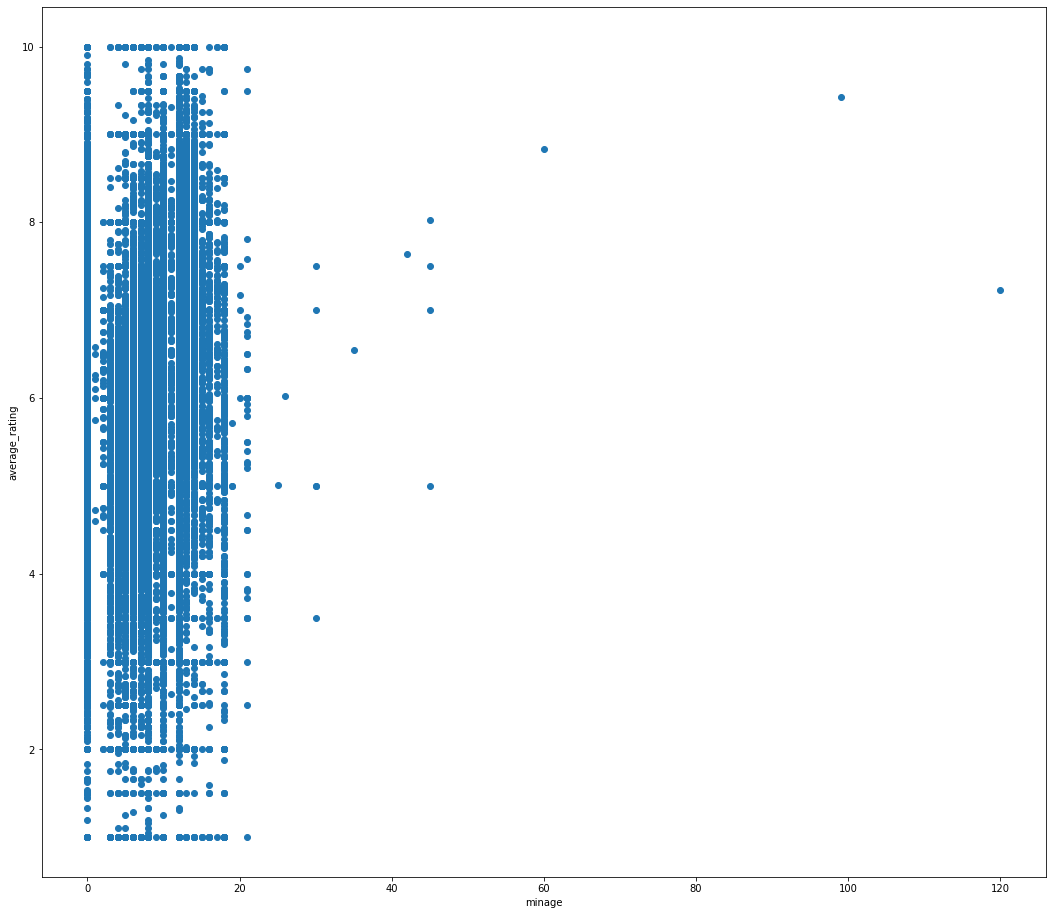

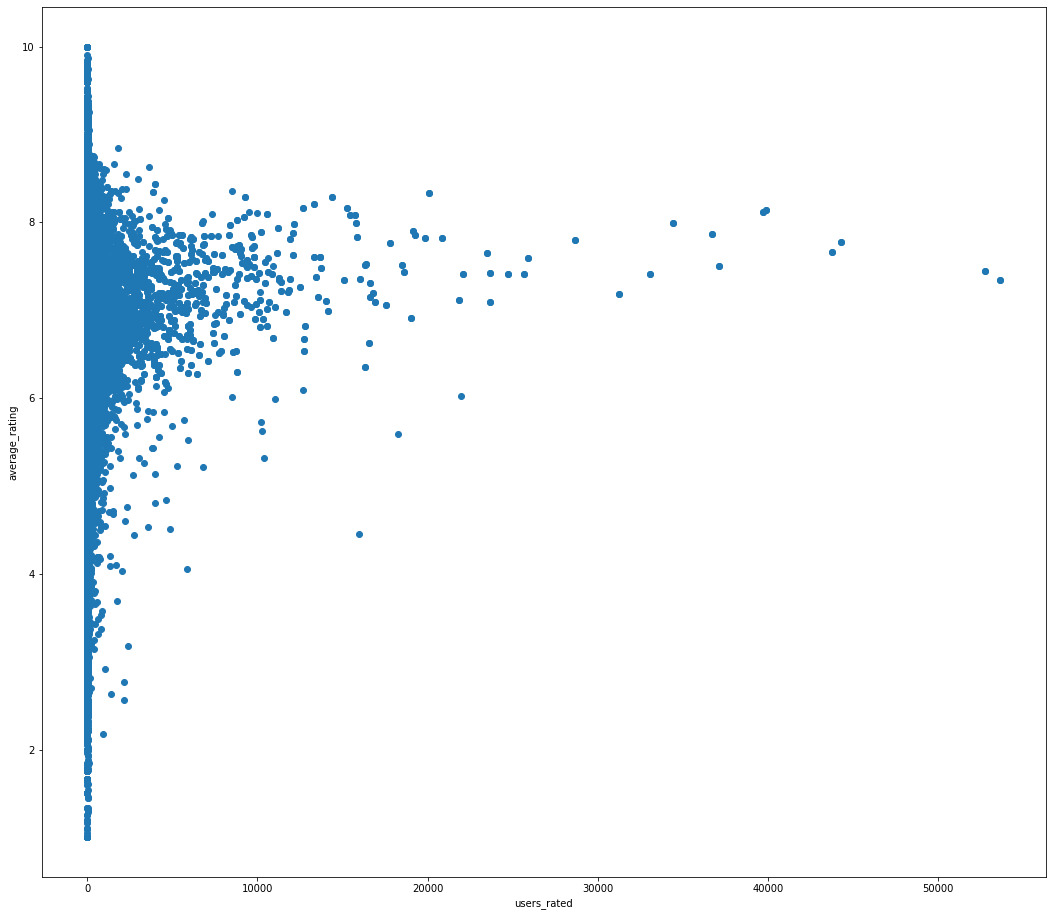

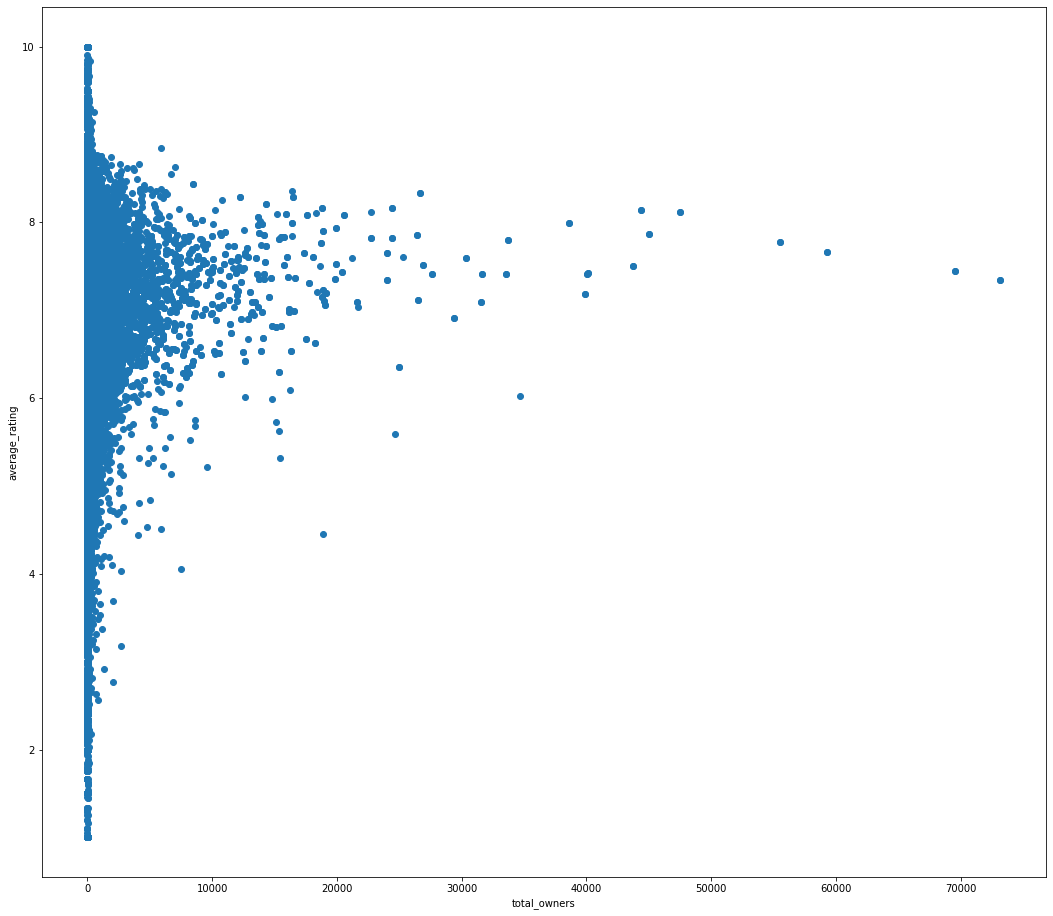

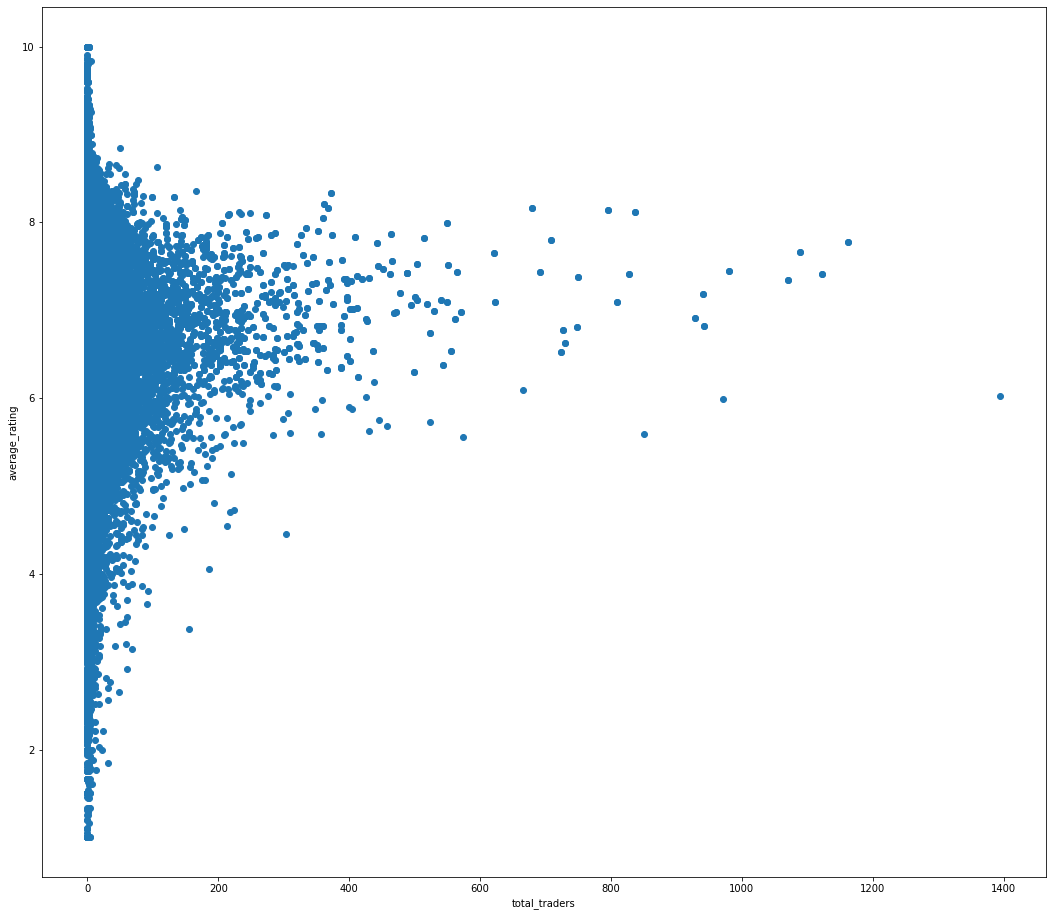

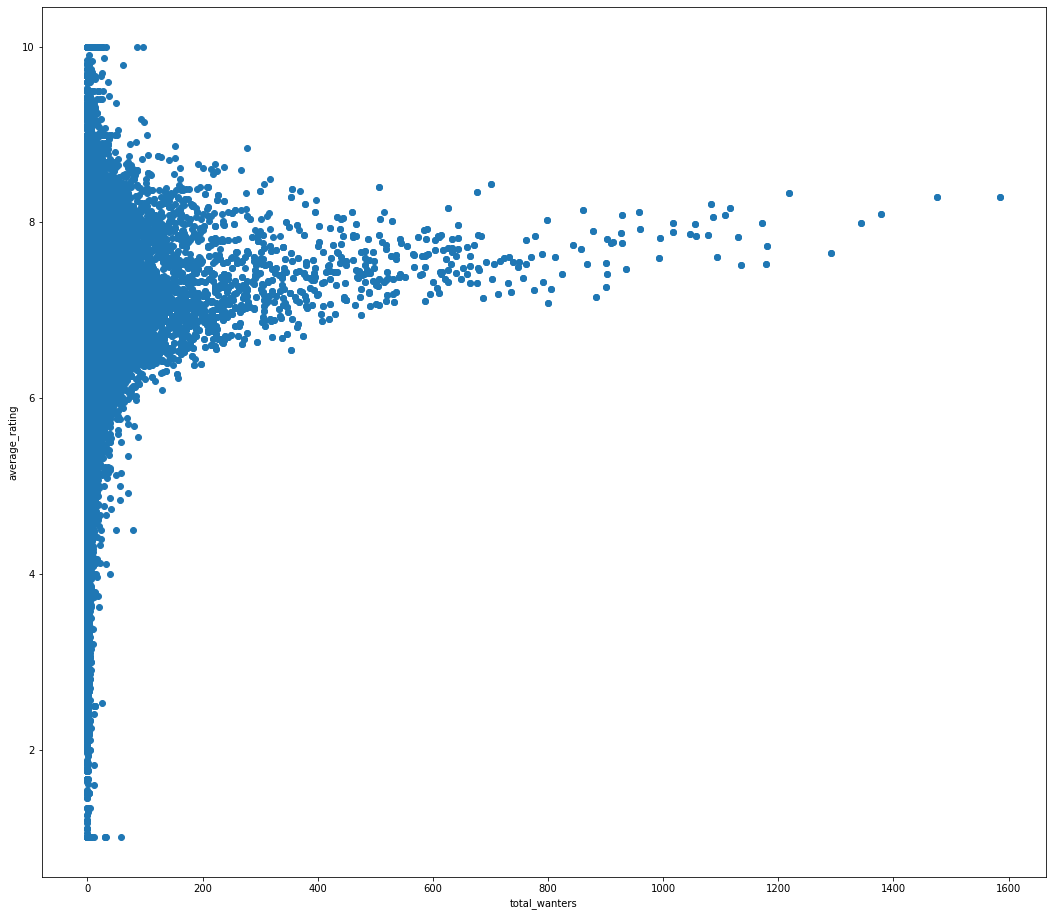

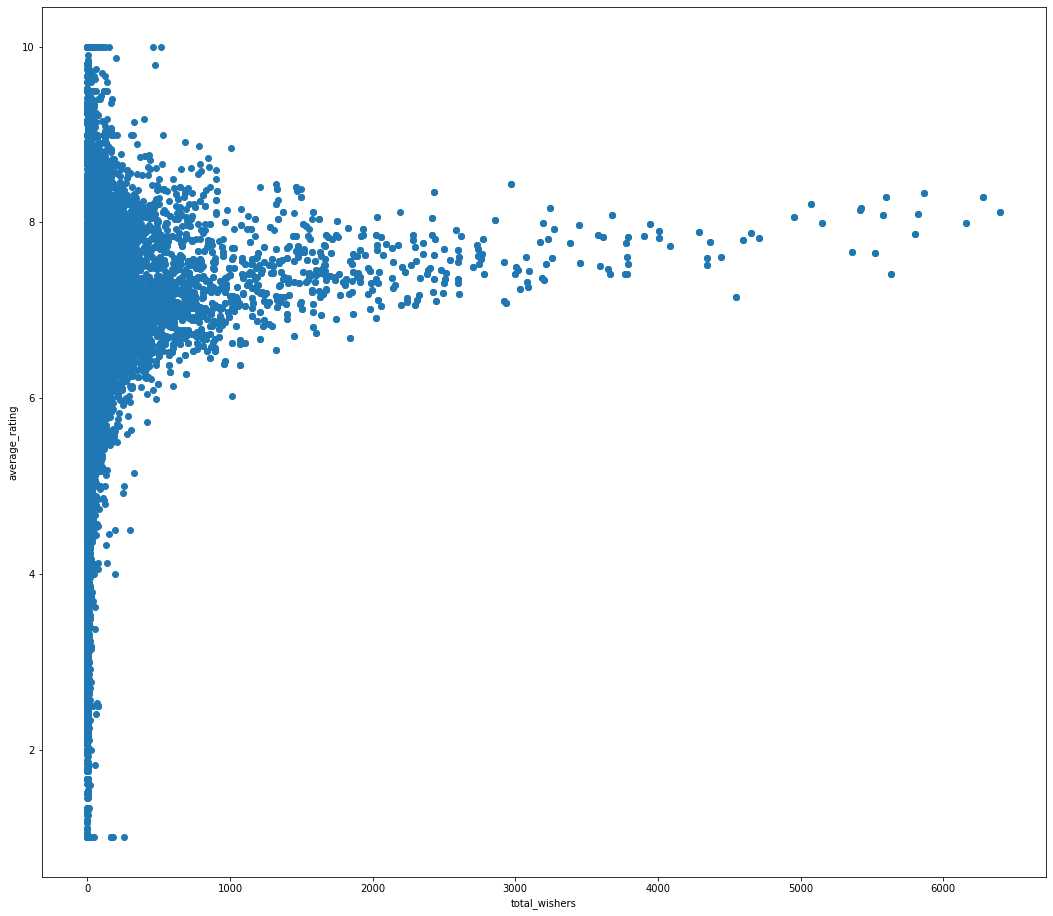

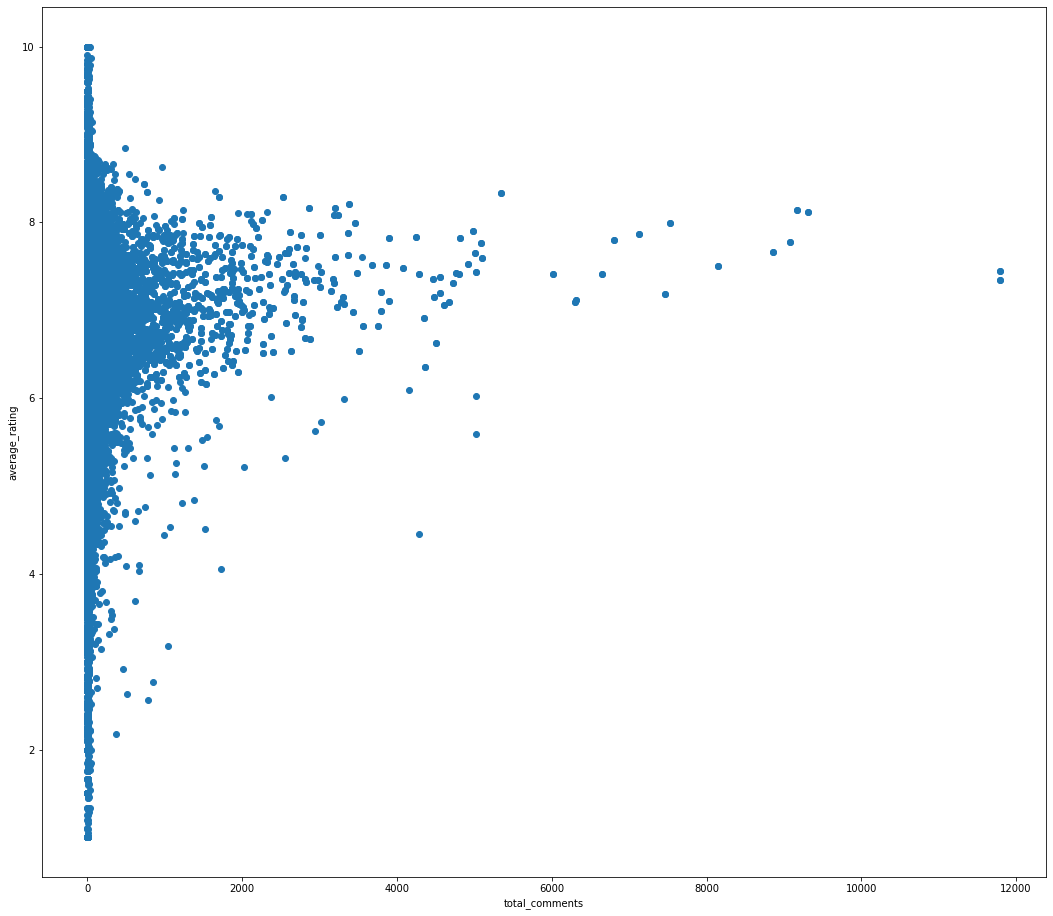

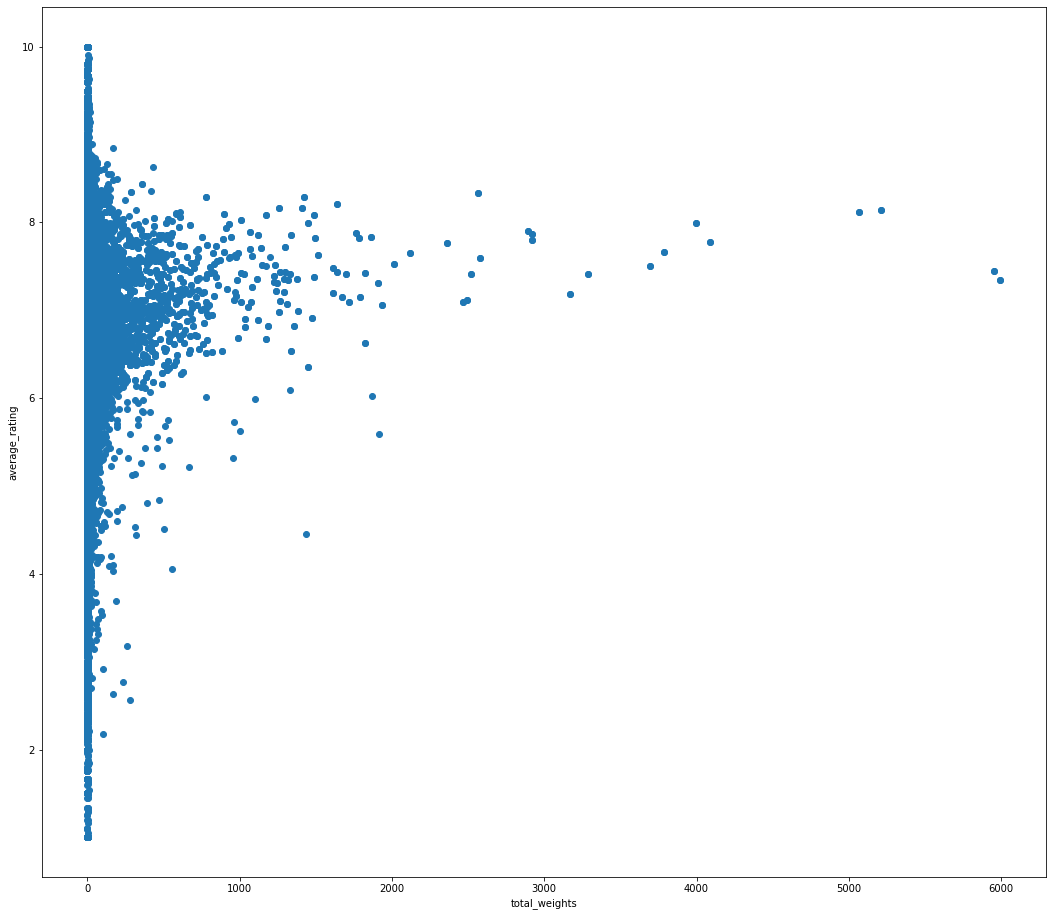

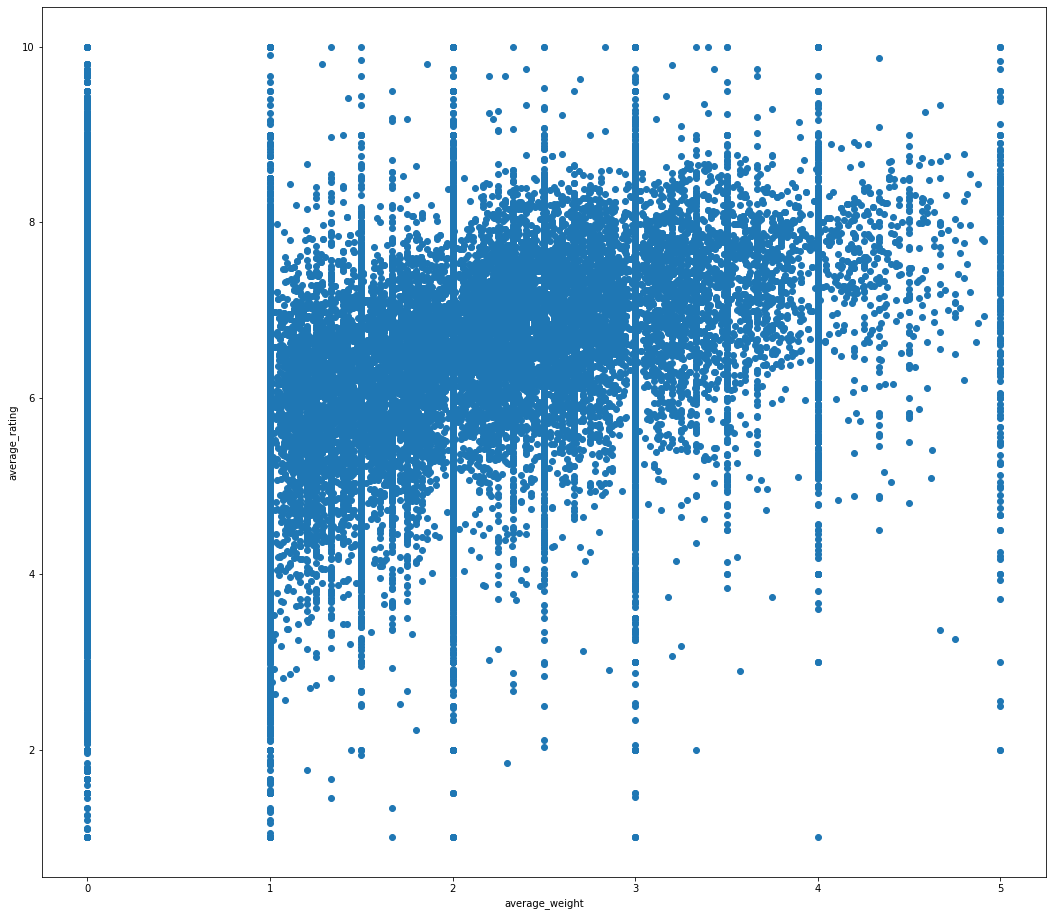

In [12]:
dfx = df.drop(columns=["average_rating"])
dfy = df["average_rating"]

for i in range(len(dfx.columns)):
    x = dfx.iloc[:,i].values
    y = dfy.values
    plt.figure(figsize=(18,16))
    plt.scatter(x, y)
    plt.xlabel(dfx.columns[i])
    plt.ylabel("average_rating")
    plt.show()

Pro plot entre rating e ano de publicação, existiram vários boardgames, onde o ano de publicação é 0 ou ainda menor que 0. Todas essas linhas com dados sem logica foram dropados. A analise é restrita para os jogos que foram publicados após os anos 1800. Similarmente, outras modificações foram conduizadas para que o dataset eliminasse extremidades e fazer o modelo ser mais generalista. Essas modificações serão mostradas abaixo.

O formato do dataframe depois das modificações revelaram o numero de linhas perdidas na modificação do dataframe, aproximadamente, 5000 linhas foram perdidas na modificação. Porém isso é um resultado OK porque a maioria dos dados eram ruidos e algumas vezes não fazia sentido usar eles nem na base de treinamento nem de teste.

In [13]:
df = df[df["yearpublished"]>1800]
df = df[df["minplayers"]<15]
df = df[df["maxplayers"]<100]
df = df[df["playingtime"]<500]
df = df[df["minage"]<20]
df = df[df["minplaytime"]<200]
df = df[df["maxplaytime"]<200]
print(df.shape)

(51055, 16)


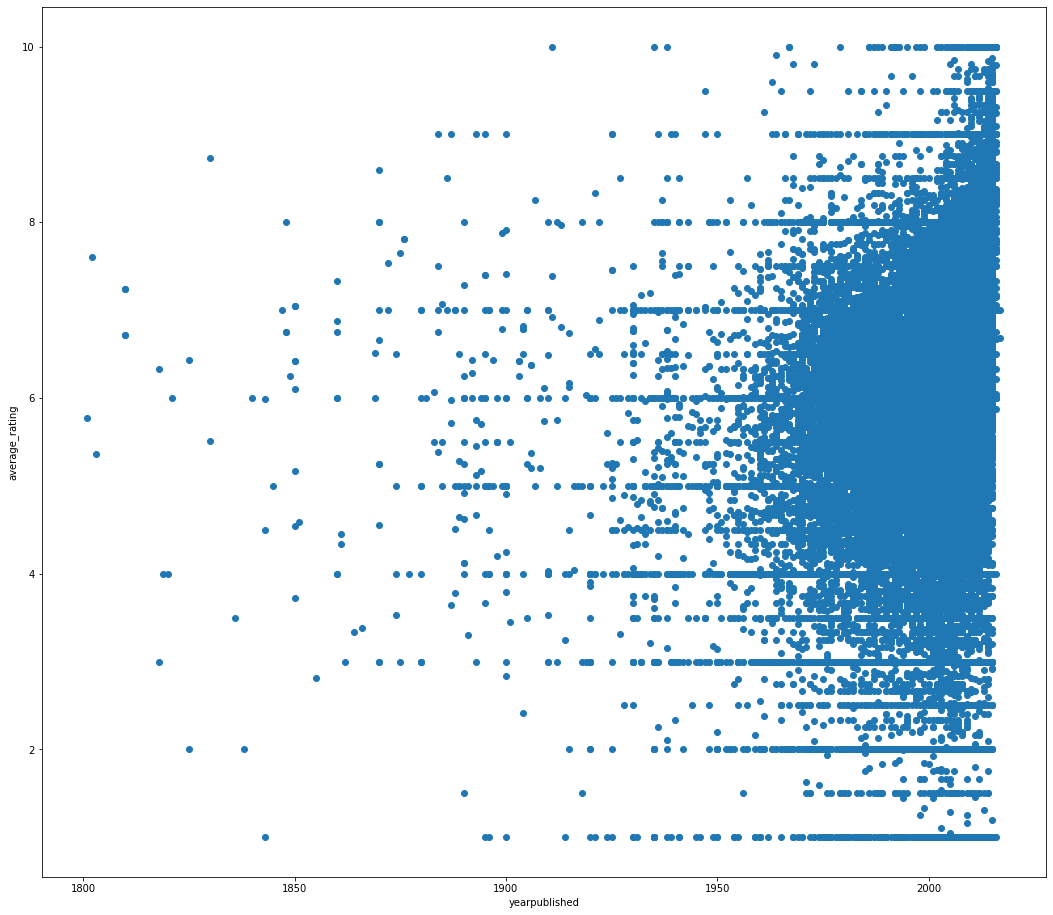

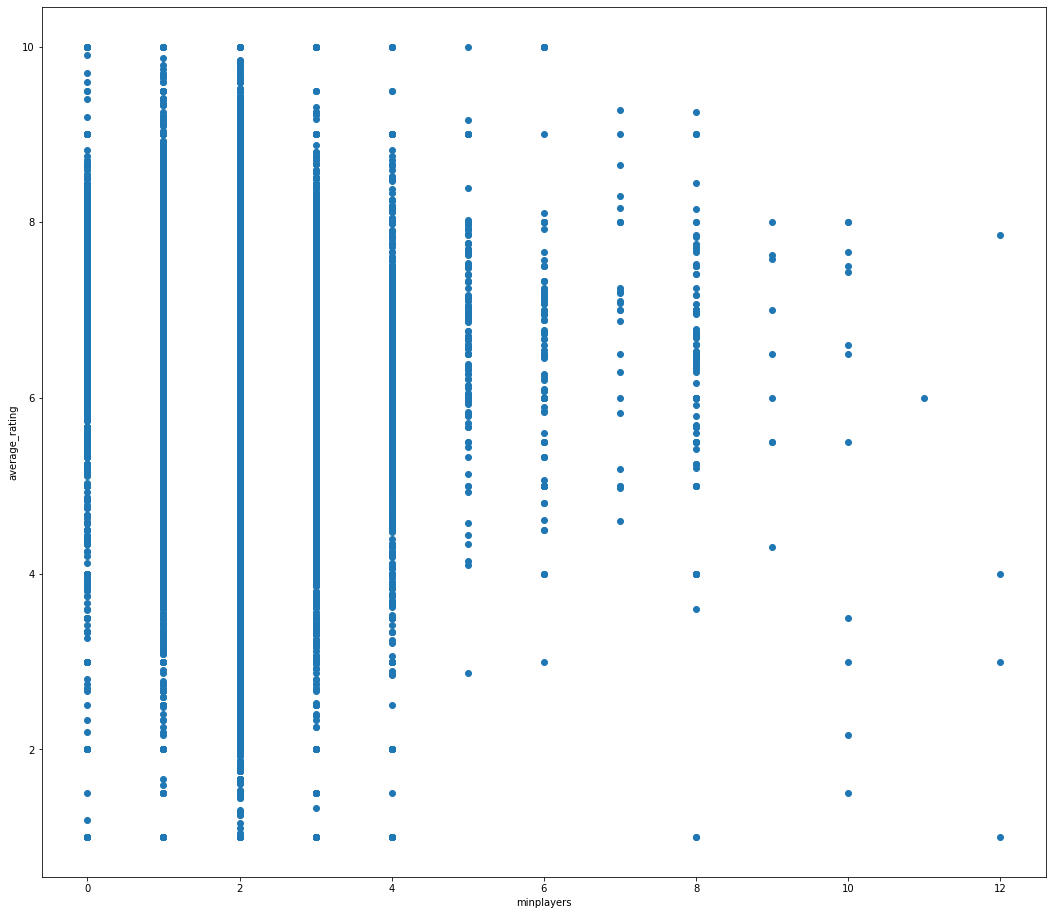

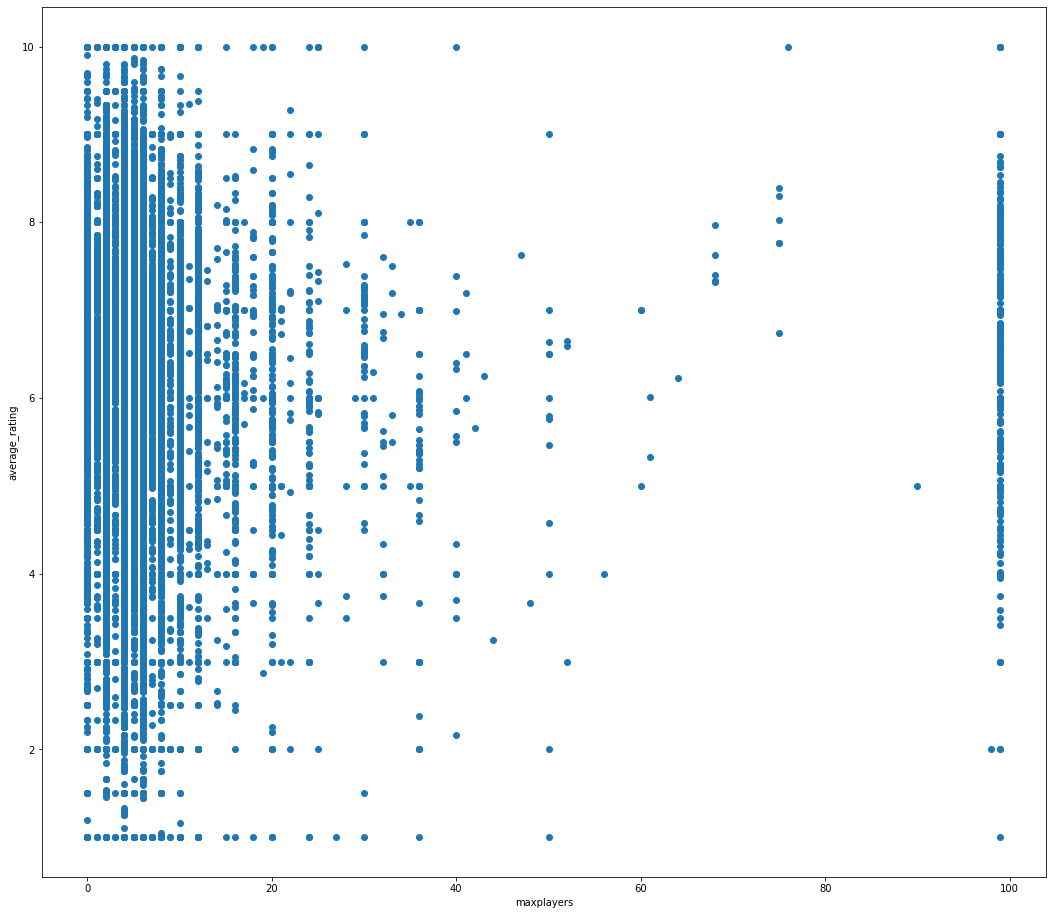

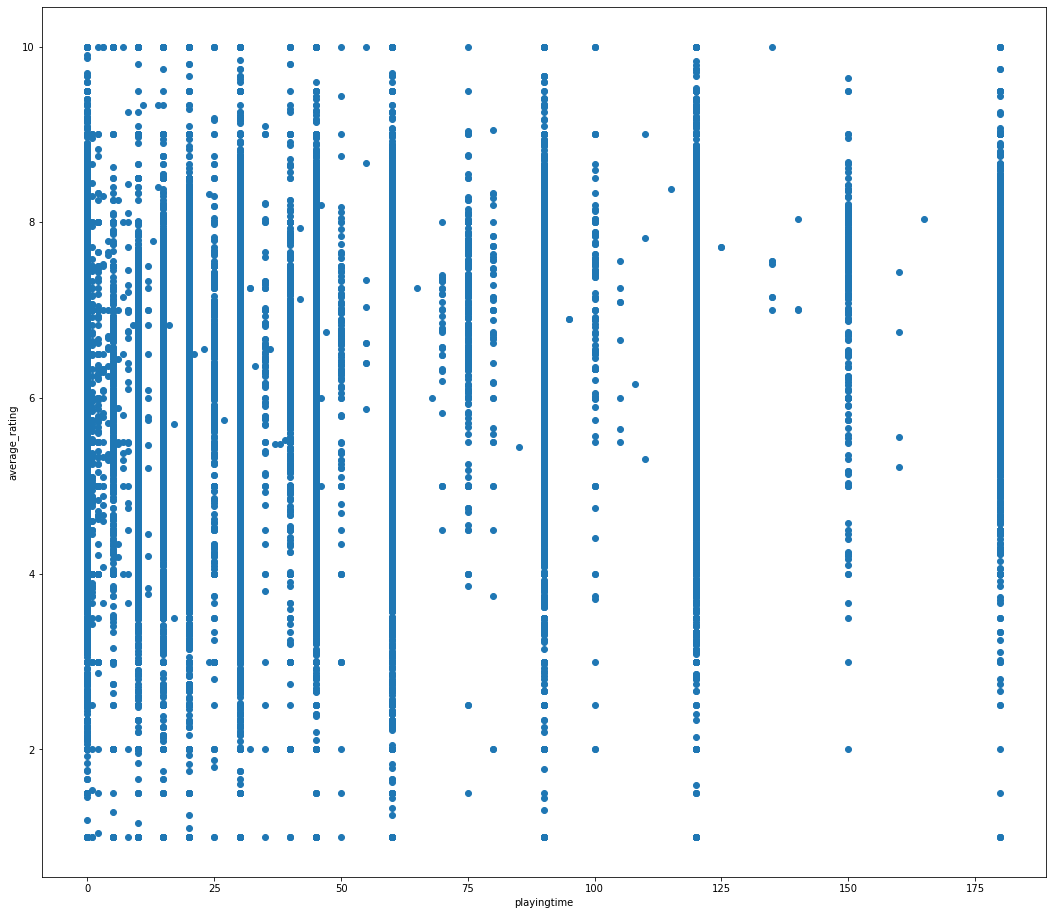

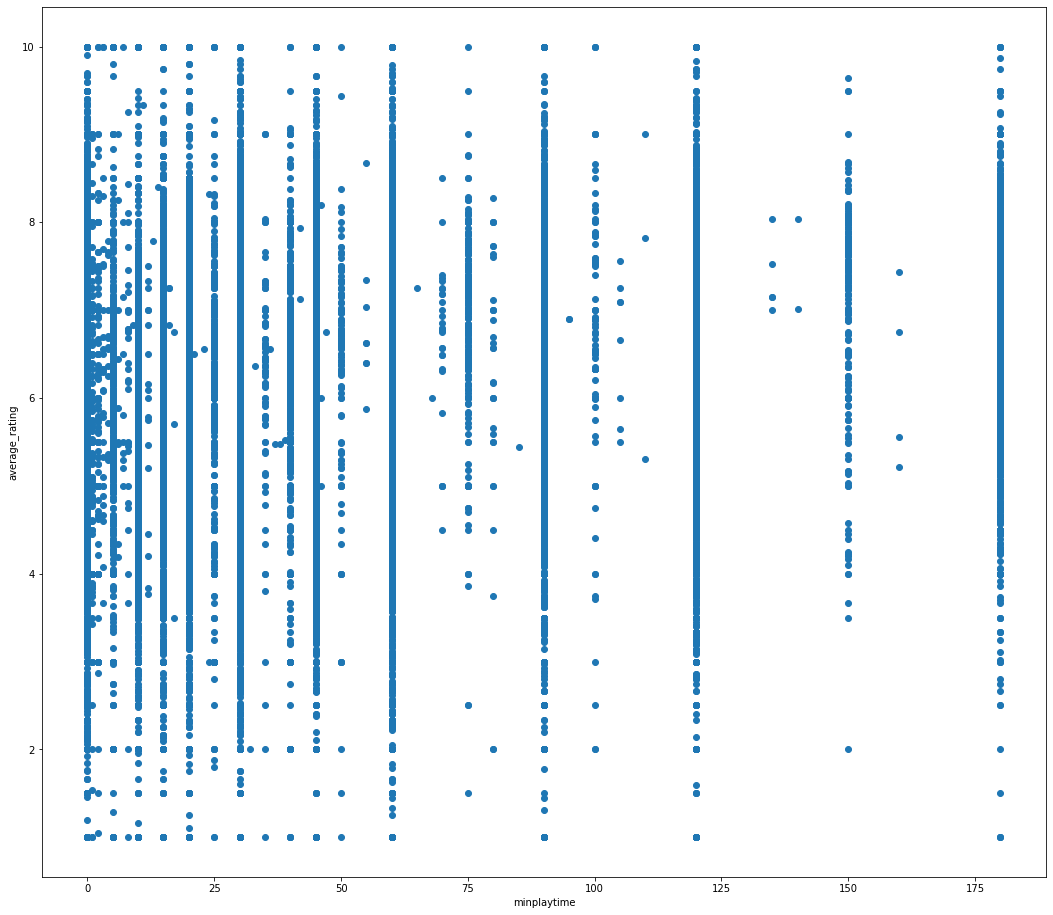

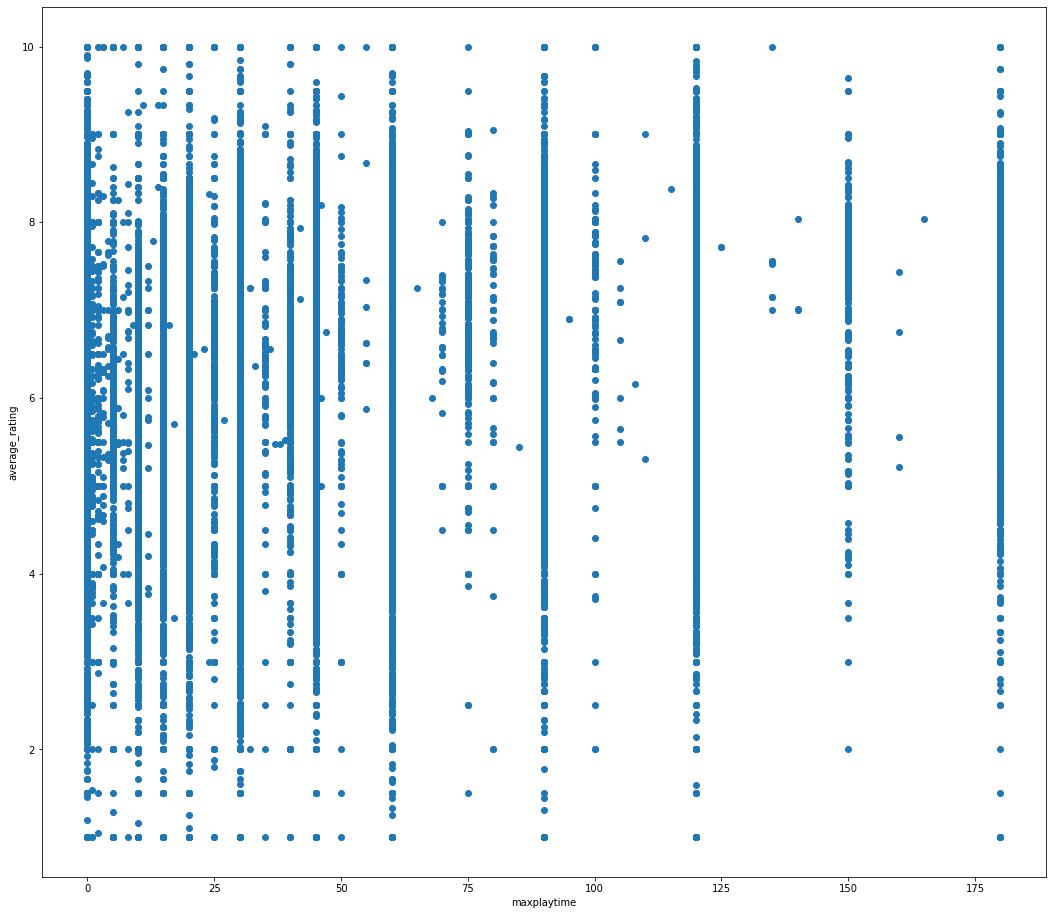

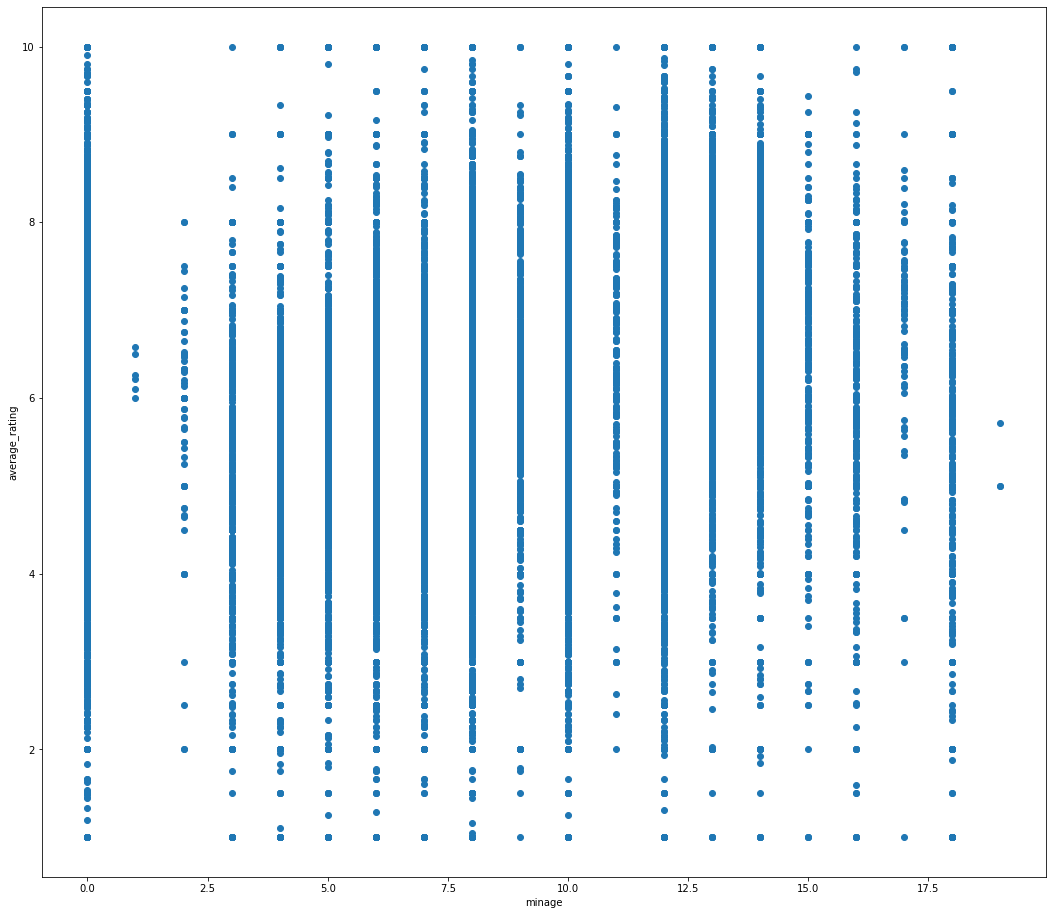

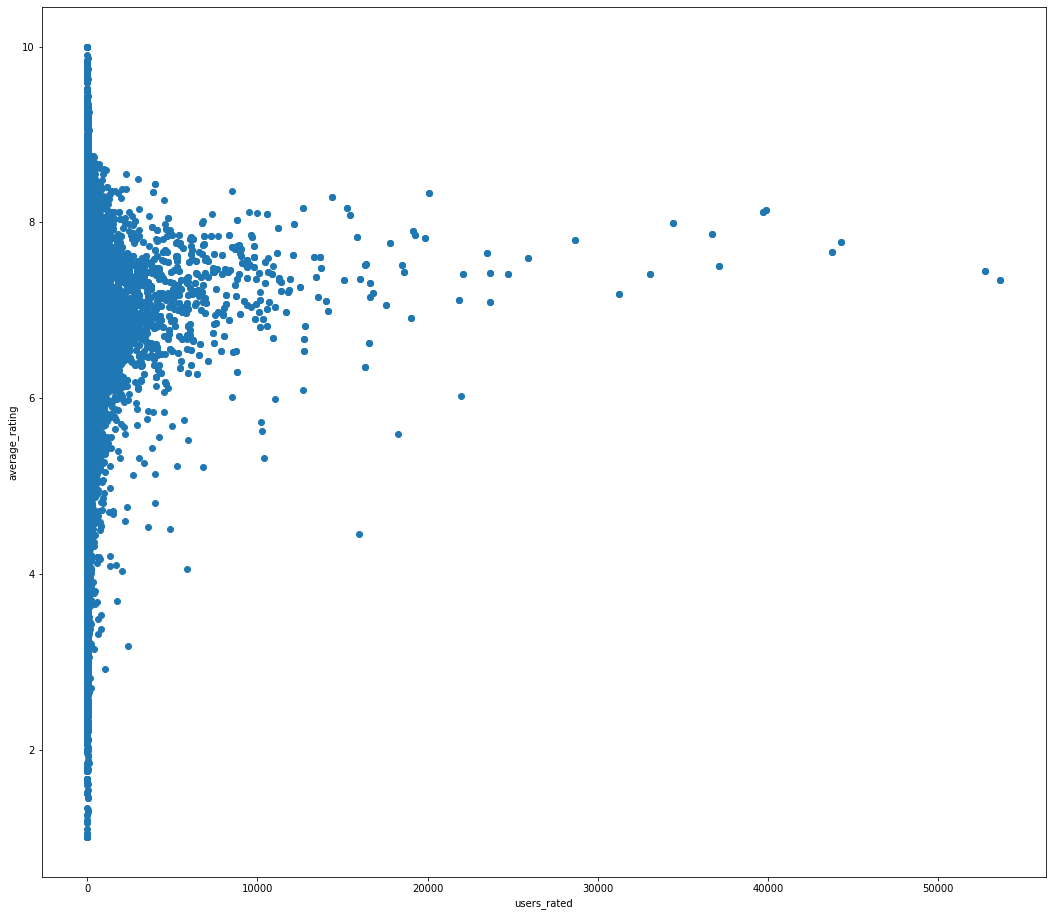

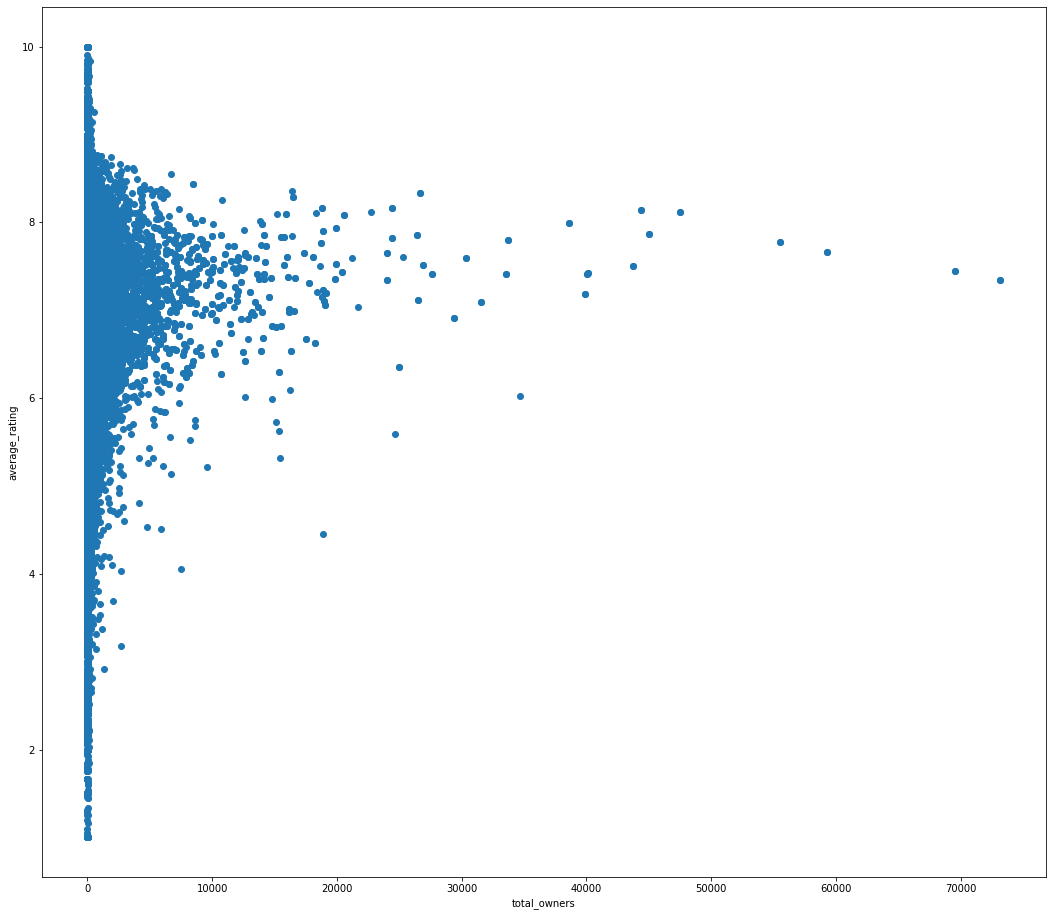

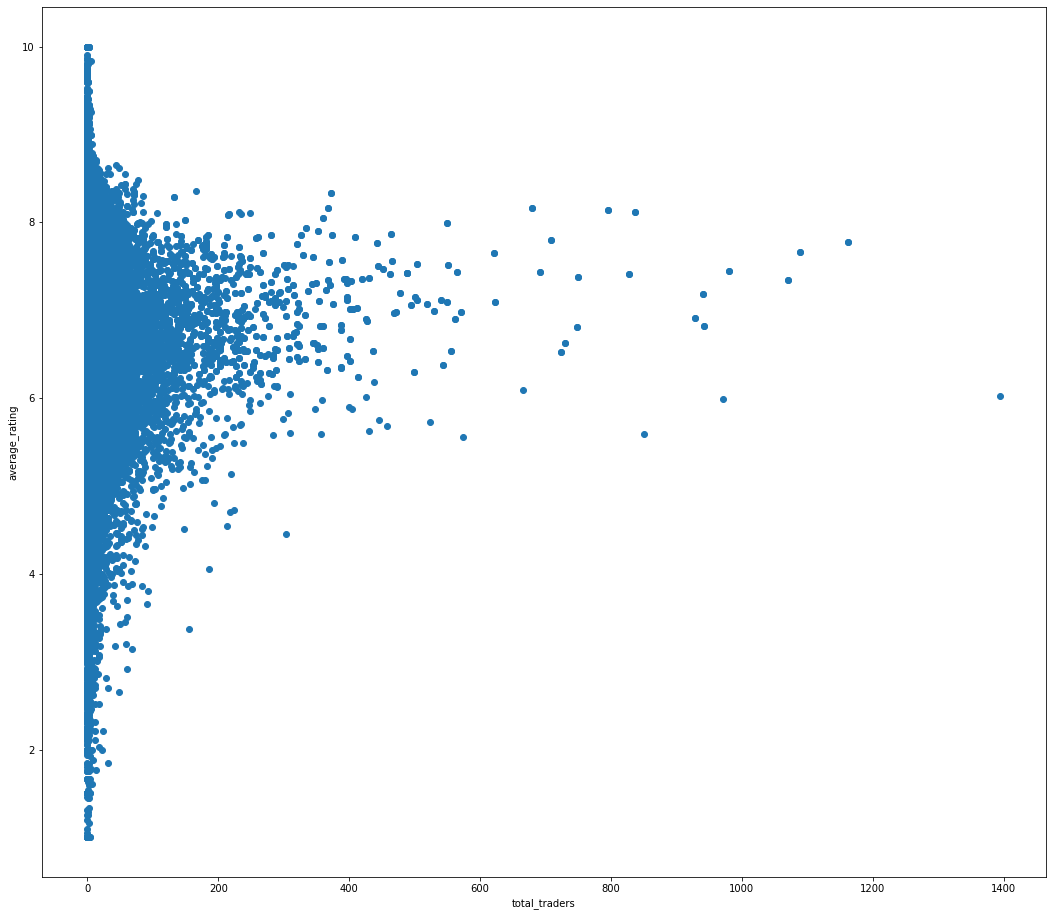

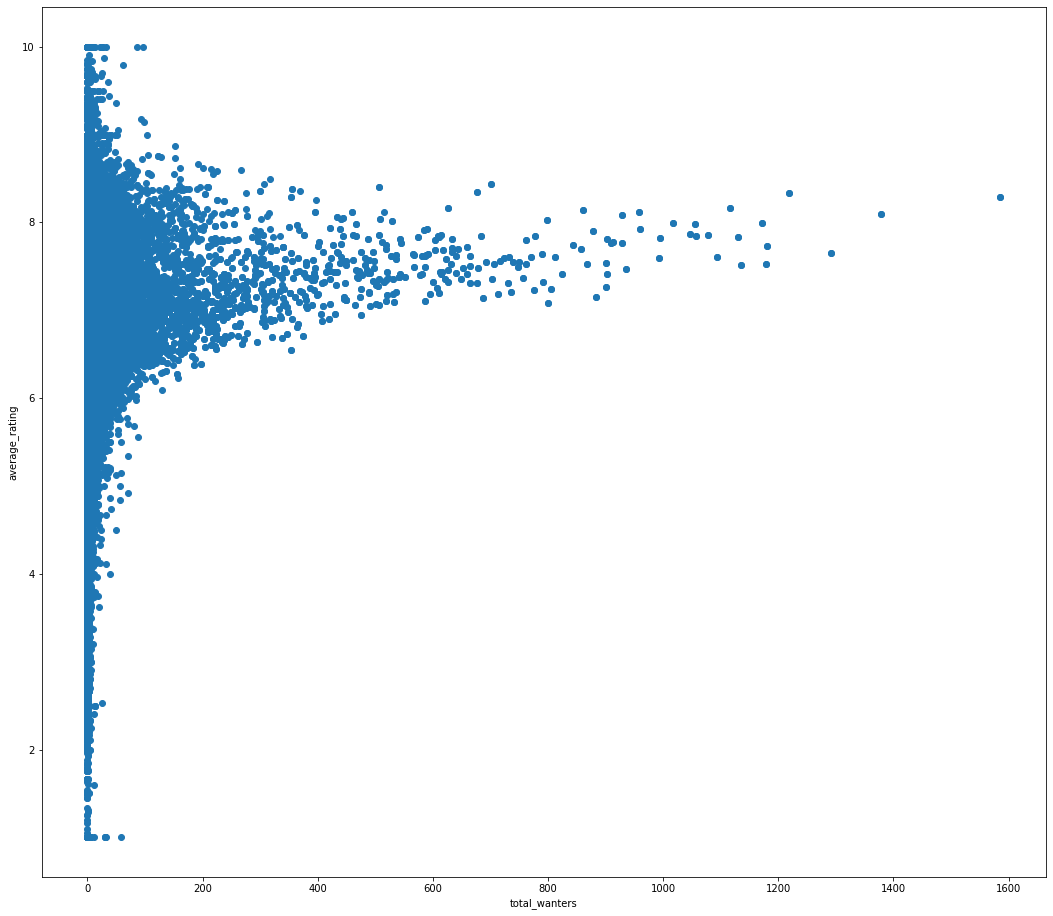

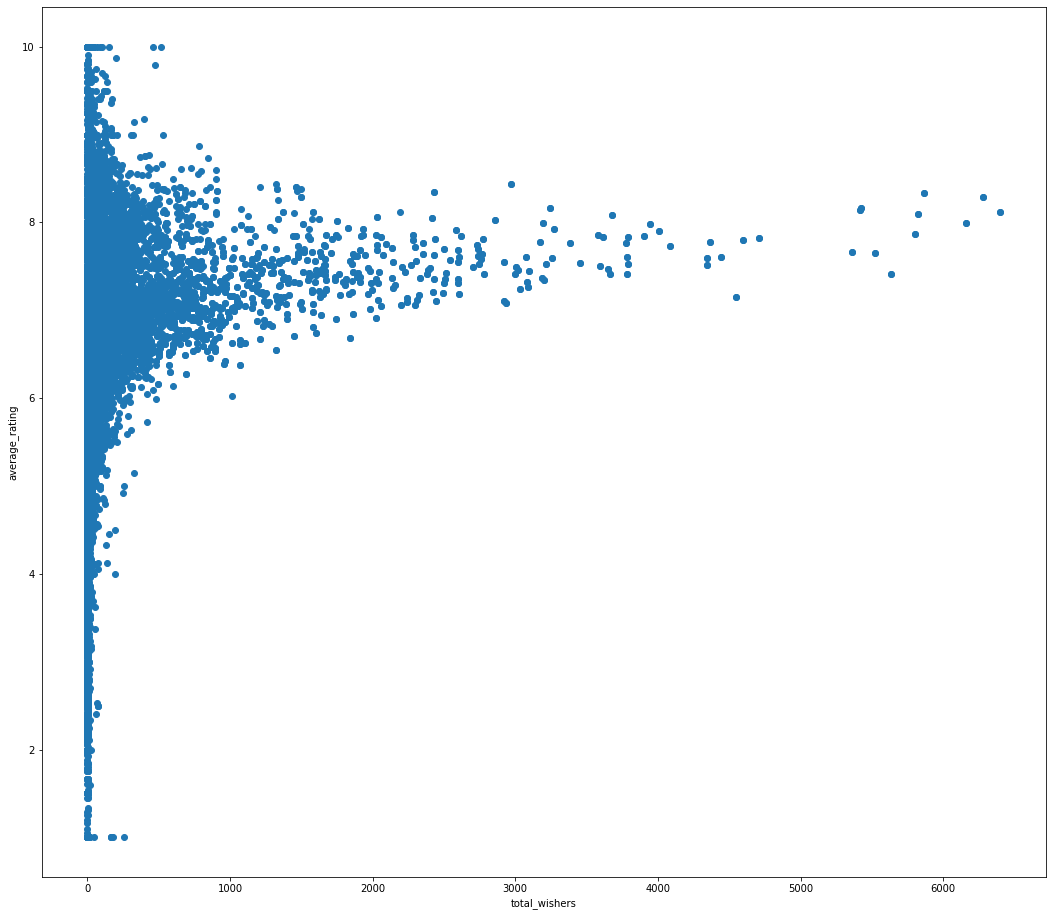

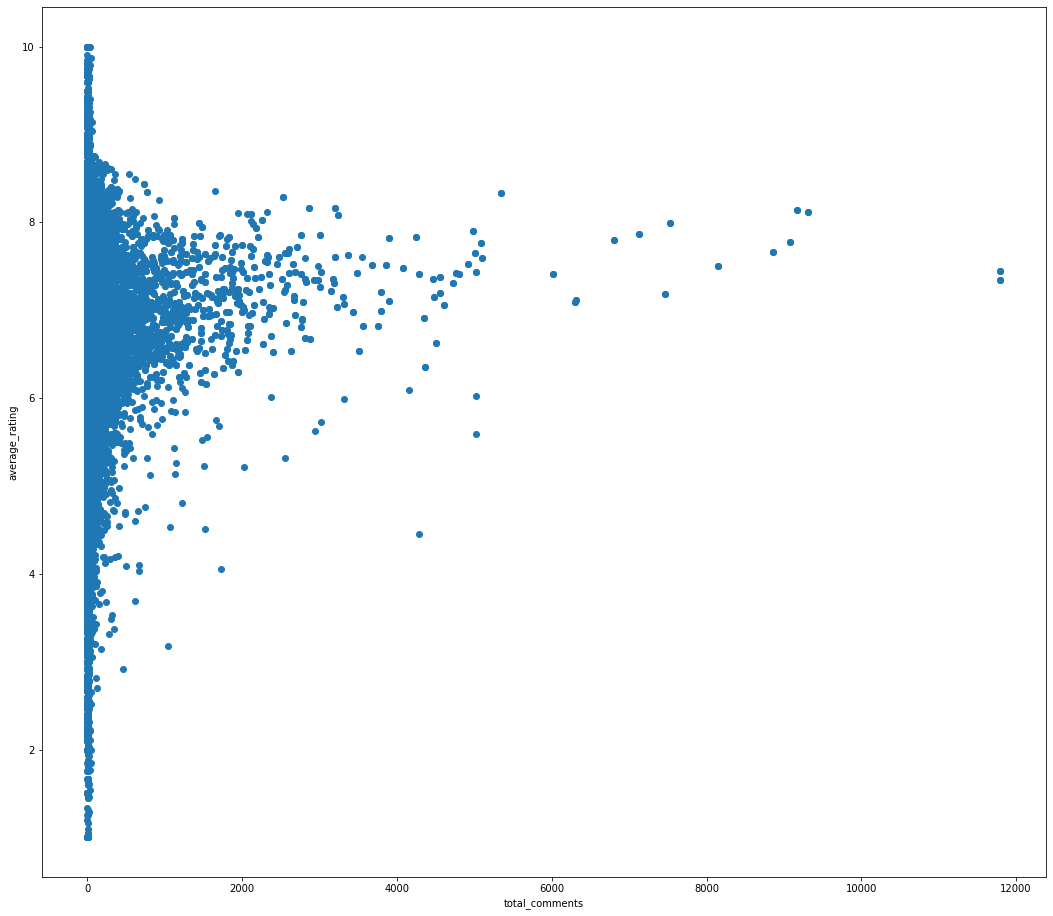

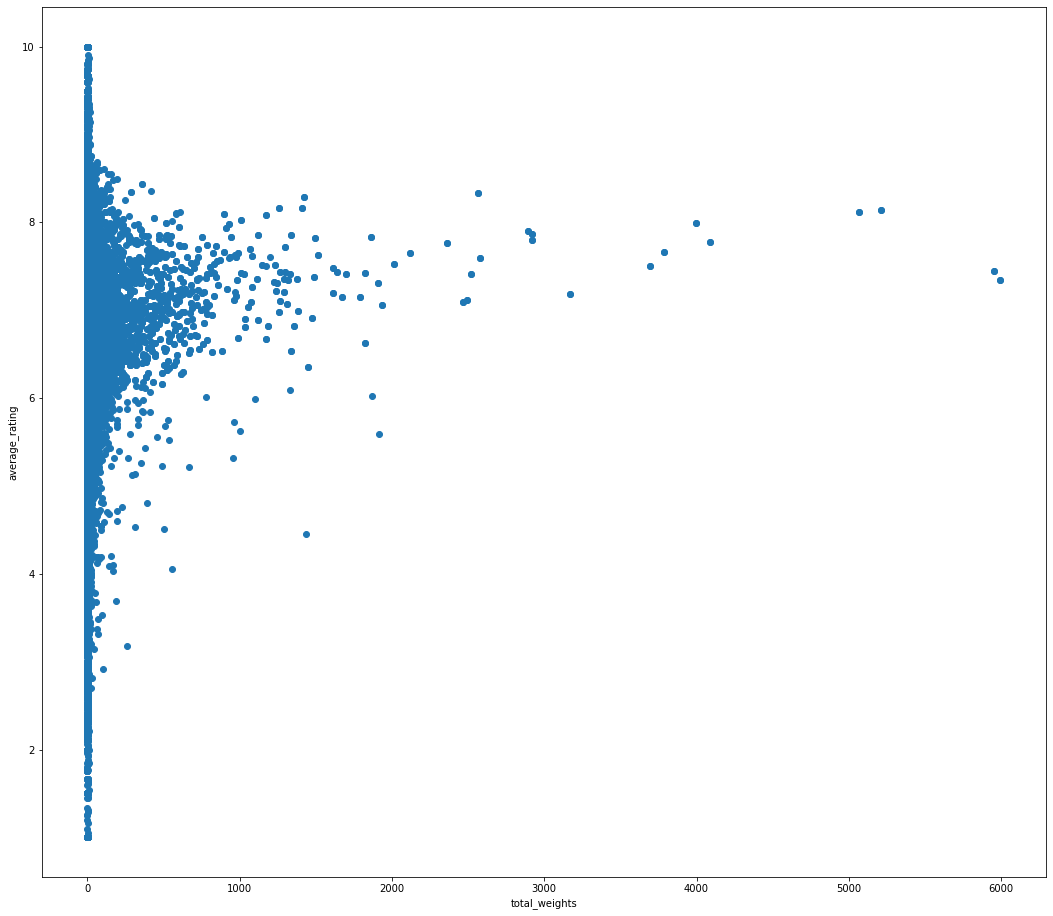

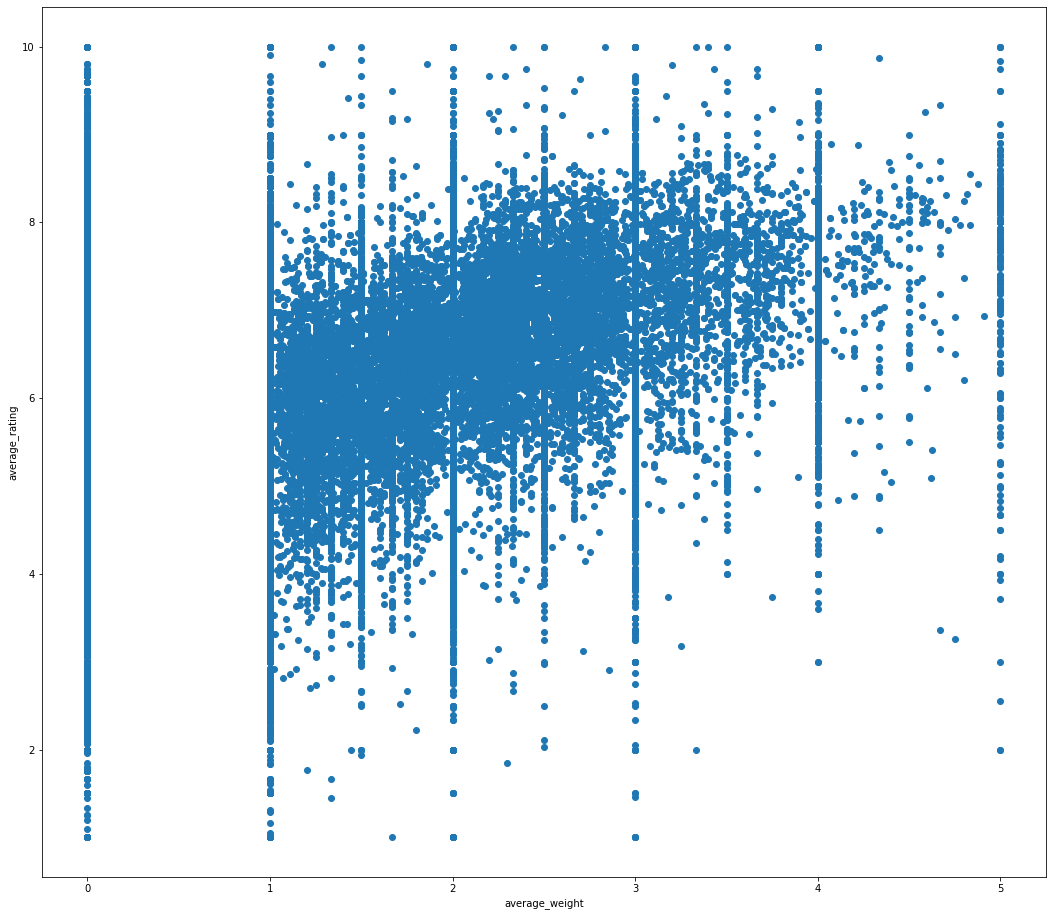

In [14]:
dfx2 = df.drop(columns=["average_rating"])
dfy2 = df["average_rating"]

for i in range(len(dfx2.columns)):
    x2 = dfx2.iloc[:,i].values
    y2 = dfy2.values
    plt.figure(figsize=(18,16))
    plt.scatter(x2, y2)
    plt.xlabel(dfx2.columns[i])
    plt.ylabel("average_rating")
    plt.show()

Depois da modificação/manipulação dos dados, os gráficos produzidos não tinham valores despareados. A dispersão dos graficos foram reduzidos numa média muito boa.

Os plots também mostraram que não havia tendencia geral entre o rating e a maioria das outras variaveis dependentes. 
Entretando, 'avarage_weight' seguia uma relação linear. Para analisar o relacionamento entre as variaveis dependentes e independentes foi feita um heatmap.

<AxesSubplot:>

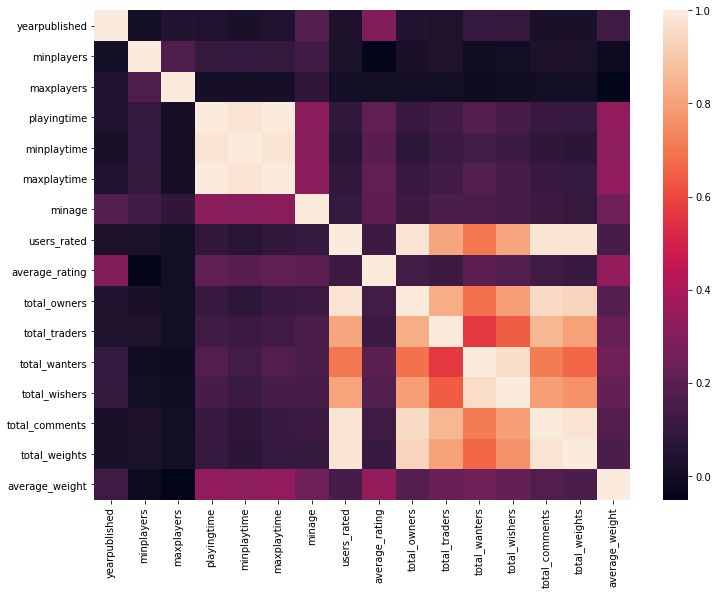

In [15]:
correlation_matrix = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

Como podemos ver no gráfico, o cociente de corelação entre o rating e outras variaveis independentes é/era bem pequeno. Porém o coeficiente é/era maximo para yearpublished e avareweight.

Os Modelos usados para as predições seriam o linear, o Random forest e o KNN. O data set vai ser dividido em duas partes, nominados como a base treinamento e a base de teste. a divisão foi feita de forma randomica. a base de teste contém 80% de todos os dados disponiveis enquanto a base de teste tem os 20% restantes.

In [16]:
X = df.drop(columns=['average_rating']).values
Y = df['average_rating'].values

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=4)

model_LR = LinearRegression().fit(train_x, train_y)
model_RFR = RandomForestRegressor(n_estimators = 50, max_depth = 6).fit(train_x, train_y)

y_true = test_y

y_pred_LR = model_LR.predict(test_x)
y_pred_RFR= model_RFR.predict(test_x)

MSE_LR = mean_squared_error(y_true, y_pred_LR)
MSE_RFR = mean_squared_error(y_true, y_pred_RFR)

MAE_LR = mean_absolute_error(y_true, y_pred_LR)
MAE_RFR = mean_absolute_error(y_true, y_pred_RFR)

print("Mean Squared Error for Linear Regressor", "%.2f" % MSE_LR)
print("Mean absolute Error for Linear Regressor", "%.2f" %MAE_LR)

print("Mean Squared Error for Random Forest Regressor", "%.2f" % MSE_RFR)
print("Mean absolute Error for Random Forest Regressor", "%.2f" %MAE_RFR)

Mean Squared Error for Linear Regressor 1.90
Mean absolute Error for Linear Regressor 1.02
Mean Squared Error for Random Forest Regressor 1.54
Mean absolute Error for Random Forest Regressor 0.90


In [17]:
X_KNN = X
Y_KNN = Y

from sklearn import preprocessing
X_KNN = preprocessing.normalize(X)

train_xKNN, test_xKNN, train_yKNN, test_yKNN = train_test_split(X_KNN, Y_KNN, test_size=0.2, random_state=4)

y_true_KNN = test_yKNN

MSE_array = []
MSE_min = 10^12
k_best = 5
k_array = []
from sklearn.neighbors import KNeighborsRegressor
for k in range(5,200):
    model = KNeighborsRegressor(n_neighbors=k) 
    model.fit(train_xKNN, train_yKNN)
    y_pred = model.predict(test_xKNN)
    MSE_temp = mean_squared_error(y_true_KNN, y_pred)
    
    if MSE_temp < MSE_min:
        MSE_min = MSE_temp
        k_best = k
    MSE_array.append(MSE_temp)
    k_array.append(k)

print("Best k parameter is ", k_best)

Best k parameter is  18


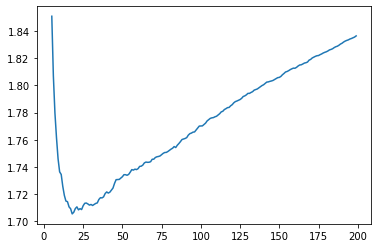

In [18]:
plt.plot(k_array, MSE_array)
plt.show()

In [19]:
model_KNN = KNeighborsRegressor(n_neighbors=k_best)
model_KNN.fit(train_xKNN, train_yKNN)
y_pred_KNN = model_KNN.predict(test_xKNN)

MSE_KNN = mean_squared_error(y_true_KNN, y_pred_KNN)
MAE_KNN = mean_absolute_error(y_true_KNN, y_pred_KNN)
print("Mean Squared Error for KNN Regressor", "%.2f" % MSE_KNN)
print("Mean absolute Error for KNN Regressor", "%.2f" %MAE_KNN)

Mean Squared Error for KNN Regressor 1.71
Mean absolute Error for KNN Regressor 0.94


Conclusão:

O MSE e a MAE para cara um dos 3 modelos estão sendo mostrados acima. o Modelo de Random Forest é o que melhor performou melhor entre os 3, mas a performance dos parametros de KNN e Random forest não tem muita diferença